<a href="https://colab.research.google.com/github/Nightmare125/Speech-Emotion-Recognition/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O(e.g. pd.rad_csv)
import os #to use operating system dependent functionality
import librosa # To extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualisation


#MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#LSTM Classifier
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow.keras import layers,regularizers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop

print("Loaded Libraries")

     |████████████████████████████████| 135 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.6 MB/s 
Loaded Libraries


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
def extract_mfcc(wav_file_name):
# This function extracts mfcc features and obtains the mean of each dimension
# Input : path_to_wav_file
# Output : mfcc_features '''
 y, sr = librosa.load(wav_file_name)
 mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
 return mfccs

##Load Dataset


In [37]:
speech_labels = [] #to save extracted labels/file
speech_data =[] #to save extracted features
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ravdess'):
  for filename in filenames:
    #print(os.path.join(dirname, filename))
    speech_labels.append(int(filename[7:8]) - 1)#the index 7 and 8 of the file name represent the emotion label
    wav_file_name = os.path.join(dirname, filename)
    speech_data.append(extract_mfcc(wav_file_name))
print("Dataset Loaded")


Dataset Loaded


In [ ]:
speech_data

In [39]:
# convert label and data to arrays
speech_data_array = np.asarray(speech_data)#convert input into an array
speech_label_array = np.array(speech_labels)
speech_label_array.shape #get tuple of array dimensions

# make categorical labels
labels_categorical = to_categorical(speech_label_array) #converts a class vector to binary matrix
labels_categorical.shape

(1455, 8)

In [40]:
speech_data_array.shape

(1455, 40)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(np.array(speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [42]:
from tensorflow.python import training
#Split the training, validating and testing sets
number_of_samples = speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples *0.1)


In [111]:
#Define the LSTM Model
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add((Dropout(0.4)))
  model.add(Activation("relu"))
  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add((Dropout(0.4)))
  model.add(Activation("relu"))
  model.add(Dense(32))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))
  model.add(Activation("relu"))
  model.add(Dense(16))
  model.add(BatchNormalization())
  model.add((Dropout(0.4)))
  model.add(Activation("relu"))
  model.add(Dense(8))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))
  model.add(Activation("softmax"))
  
  #configures the model for training
  model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
  return model

 
 

In [112]:
w = np.expand_dims(speech_data_array[:training_samples], -1)

In [113]:
w.shape

(1164, 40, 1)

In [116]:
#train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(speech_data_array[training_samples:training_samples+validation_samples],-1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=50, shuffle=True)

Epoch 1/50
37/37 [==============================] - 7s 84ms/step - loss: 2.7107 - accuracy: 0.1323 - val_loss: 2.0855 - val_accuracy: 0.1655
Epoch 2/50
37/37 [==============================] - 3s 69ms/step - loss: 2.6649 - accuracy: 0.1263 - val_loss: 2.0911 - val_accuracy: 0.1586
Epoch 3/50
37/37 [==============================] - 2s 62ms/step - loss: 2.6337 - accuracy: 0.1280 - val_loss: 2.0866 - val_accuracy: 0.1793
Epoch 4/50
37/37 [==============================] - 2s 64ms/step - loss: 2.5557 - accuracy: 0.1332 - val_loss: 2.0850 - val_accuracy: 0.1862
Epoch 5/50
37/37 [==============================] - 3s 85ms/step - loss: 2.4982 - accuracy: 0.1314 - val_loss: 2.0841 - val_accuracy: 0.1862
Epoch 6/50
37/37 [==============================] - 5s 134ms/step - loss: 2.4962 - accuracy: 0.1134 - val_loss: 2.0744 - val_accuracy: 0.1448
Epoch 7/50
37/37 [==============================] - 5s 124ms/step - loss: 2.4627 - accuracy: 0.1160 - val_loss: 2.0812 - val_accuracy: 0.1379
Epoch 8/50


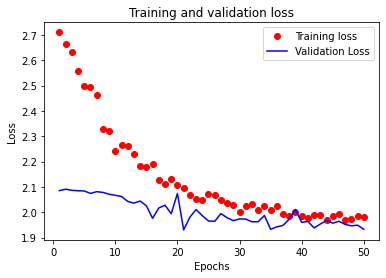

In [117]:
###Loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

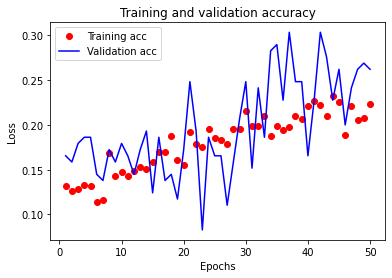

In [118]:
###Accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
###evaluate using model A
model_A.evaluate(np.expand_dims(speech_data_array[training_samples + validation_samples:],-1), labels_categorical[training_samples+validation_samples:])

5/5 [==============================] - 0s 19ms/step - loss: 1.8328 - accuracy: 0.2808


[1.8328039646148682, 0.28082191944122314]

In [66]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [67]:
predict('/content/drive/MyDrive/ravdess/Actor_04/03-01-01-01-01-01-04.wav')

1/1 [==============================] - 1s 555ms/step
surprised


In [68]:
predict('/content/drive/MyDrive/ravdess/Actor_04/03-01-03-01-02-01-04.wav')

1/1 [==============================] - 0s 28ms/step
surprised


In [69]:
predict('/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Sad/OAF_bean_sad.wav')

1/1 [==============================] - 0s 24ms/step
sad


In [70]:
from tensorflow.keras.models import load_model
model_A.save('/content/drive/MyDrive/Models/speech.h5')